In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


PART 1:

In [64]:
df["category"].unique()

array(['Hi-Fi Speakers', 'CD, Disc & Tape Players', 'Wearable Technology',
       'Light Bulbs', 'Bathroom Lighting',
       'Heating, Cooling & Air Quality', 'Coffee & Espresso Machines',
       'Lab & Scientific Products', 'Smart Speakers',
       'Motorbike Clothing', 'Motorbike Accessories',
       'Motorbike Batteries', 'Motorbike Boots & Luggage',
       'Motorbike Chassis', 'Handmade Home & Kitchen Products',
       'Hardware', 'Storage & Home Organisation',
       'Fireplaces, Stoves & Accessories', 'PC Gaming Accessories',
       'USB Gadgets', 'Blank Media Cases & Wallets', 'Car & Motorbike',
       'Boys', 'Sports & Outdoors', 'Microphones', 'String Instruments',
       'Karaoke Equipment', 'PA & Stage',
       'General Music-Making Accessories', 'Wind Instruments',
       'Handmade Gifts', 'Fragrances', 'Calendars & Personal Organisers',
       'Furniture & Lighting', 'Computer Printers', 'Ski Goggles',
       'Snowboards', 'Skiing Poles', 'Downhill Ski Boots',
       'Hiki

In [65]:
#1: Generate a frequency table for the product `category`.
df["category"].value_counts()

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [66]:
#Which are the top 5 most listed product categories?
df["category"].value_counts().head(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

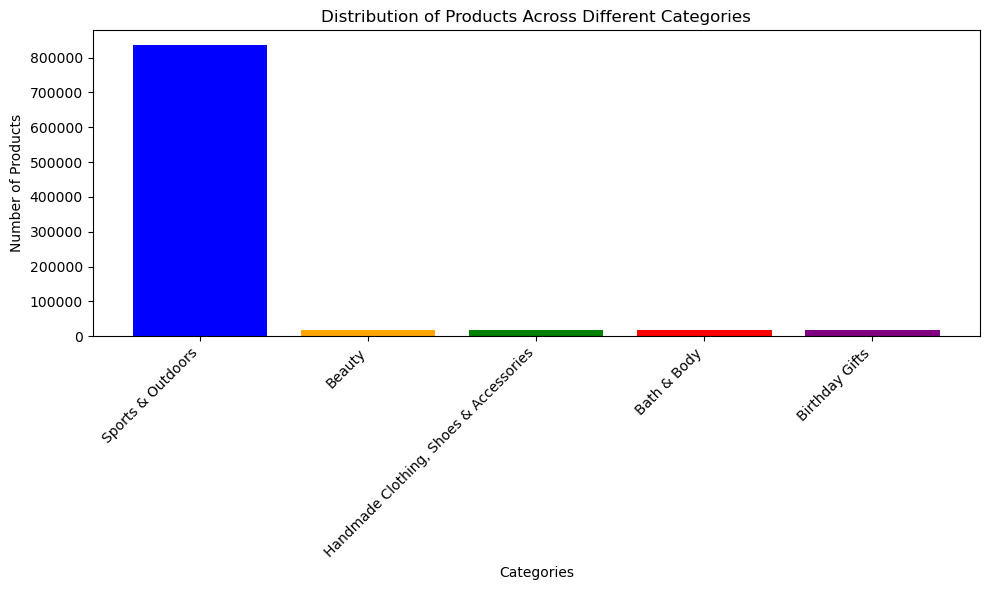

In [67]:
#2  Display the distribution of products across different categories using a bar chart. 
# *If you face problems understanding the chart, do it for a subset of top categories.

import matplotlib.pyplot as plt

# Define the data of the 5 top categories as a dictionary

data = {
    'Sports & Outdoors': 836265,
    'Beauty': 19312,
    'Handmade Clothing, Shoes & Accessories': 19229,
    'Bath & Body': 19092,
    'Birthday Gifts': 18978
}

# Extract categories and values from the dictionary
categories = list(data.keys())
values = list(data.values())

# Create a bar chart
plt.figure(figsize=(10, 6))  # Set the size of the figure
plt.bar(categories, values, color=['blue', 'orange', 'green', 'red', 'purple'])  # Color for each bar
plt.title('Distribution of Products Across Different Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

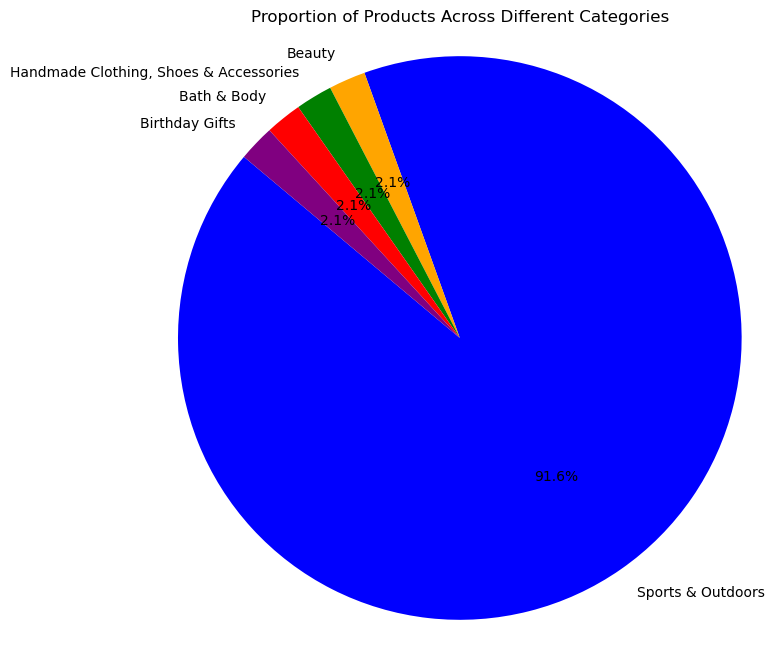

In [68]:
# *For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

# Extract categories and values from the dictionary
categories = list(data.keys())
values = list(data.values())

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the size of the figure
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Proportion of Products Across Different Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Sports and Outdoors products are dominating the listing from amazon UK 

PART 2:

In [71]:
# Calculate the mean, median, and mode for the `price` of products.

In [72]:
#Calculate the mean
df["price"].mean()

89.24380943923663

In [73]:
#Calculate the median
df["price"].median()

19.09

In [74]:
#Calculate the mode
df["price"].mode()

0    9.99
Name: price, dtype: float64

In [75]:
#Calculate the variance
df["price"].var()

119445.48532256528

In [76]:
#Calculate the standart deviation
df["price"].std()

345.60886175352226

In [77]:
#Calculate the range
range_price = df["price"].max() - df["price"].min()
range_price

100000.0

In [78]:
#calculate the interquartile
q3, q1 = np.percentile(df["price"], [75, 25])
iqr = q3 - q1
iqr

36.0

In [79]:
#How varied are the product prices?

The product prices varied a lot (119445.48)

In [81]:
#Are there any indicators of a significant spread in prices?

The product prices are highly varied with significant indicators of a large spread in prices (High variance and standard deviation). 
The range further confirms that there are substantial differences between the highest and the lowest prices.
The IQR indicates that while the overall distribution is broad, a large portion of the products may have more closely related prices, with outliers driving the wider spread.

This suggest a market with a wide variety of product price points, possiblu catering to both low-cost and high-end markets.

In [83]:
#Visualization
#Is there a specific price range where most products fall? 
#Plot a histogram to visualize the distribution of product prices. 
#If its hard to read these diagrams, think why this is, and explain how it could be solved.

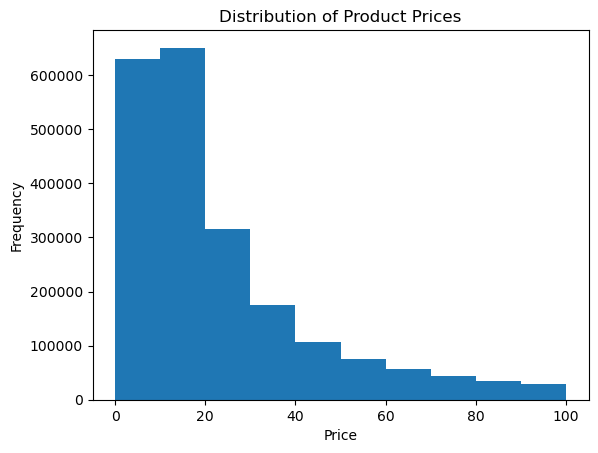

In [84]:
#Display a graph with prices lower than 100 pounds
limited_range = df[df["price"] <= 100]

plt.hist(limited_range["price"], bins=10)

plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

We can see that most of the products are having prices between 0 and 20 pounds

It was hard to see the distribution of the products according to the prices because of some outliers that skew positively the graph

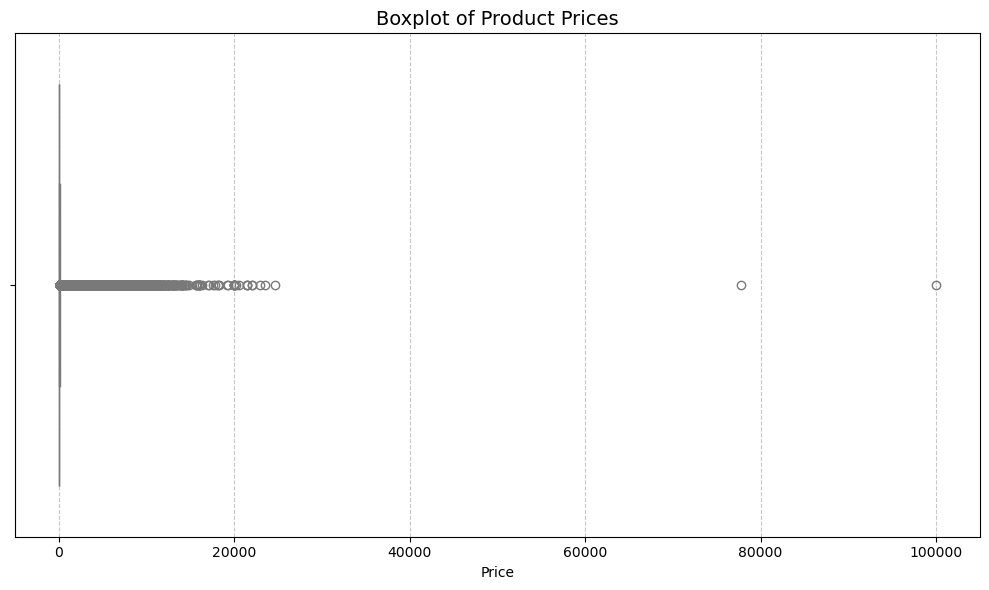

In [108]:
#Are there products that are priced significantly higher than the rest? 
#Use a box plot to showcase the spread and potential outliers in product pricing.

# Boxplot to showcase the spread and potential outliers in product pricing
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'], color='lightblue')

# Customize the plot
plt.title('Boxplot of Product Prices', fontsize=14)
plt.xlabel('Price')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

It appears that there are some product outliers at 80000 and 100000 pounds

PART 3:

In [114]:
#Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

In [118]:
#Calculate the mean
df["stars"].mean()

2.152836472966065

In [120]:
#Calculate the mode
df["stars"].mode()

0    0.0
Name: stars, dtype: float64

In [122]:
#Calculate the median
df["stars"].median()

0.0

In [124]:
#How do customers generally rate products? Is there a common trend?

In conclusion, customers generally do not rate products, or they are dissatisfied with them.
This is well-supported by the data mean / mode / median observed.

In [129]:
#Determine the variance, standard deviation, and interquartile range for product `rating`.

# Calculate variance
variance_stars = df['stars'].var()
print(f"Variance of stars: {variance_stars}")

# Calculate standard deviation
std_dev_stars = df['stars'].std()
print(f"Standard Deviation of stars: {std_dev_stars}")

# Calculate the interquartile range (IQR)
Q1 = df['stars'].quantile(0.25)  # 25th percentile
Q3 = df['stars'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1
print(f"Interquartile Range (IQR) of stars: {IQR}")


Variance of stars: 4.81743402976196
Standard Deviation of stars: 2.1948653785054697
Interquartile Range (IQR) of stars: 4.4


In [131]:
#Are the ratings consistent, or is there a wide variation in customer feedback?

There is a wide variation in customer feedback based on the statistics, suggesting inconsistency in how products are rated.

In [136]:
#Calculate the skewness and kurtosis for the `rating` column. 

In [134]:
# Calculate skewness
skewness = df['stars'].skew()
print(f"Skewness of stars: {skewness}")

# Calculate kurtosis
kurtosis = df['stars'].kurtosis()
print(f"Kurtosis of stars: {kurtosis}")

Skewness of stars: 0.08120735761080985
Kurtosis of stars: -1.9260061280432985


In [138]:
#Are the ratings normally distributed, or do they lean towards higher or lower values?

The ratings appear to be approximately normally distributed, with a slight positive skewness that indicates a slight tendency for higher ratings. However, it is not pronounced enough to suggest a significant leaning toward higher values.
The negative kurtosis suggests a lack of extreme ratings. Most ratings likely cluster around the mean, and there are fewer outlier ratings compared to a normal distribution.

In [145]:
#Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

<Axes: xlabel='stars', ylabel='Count'>

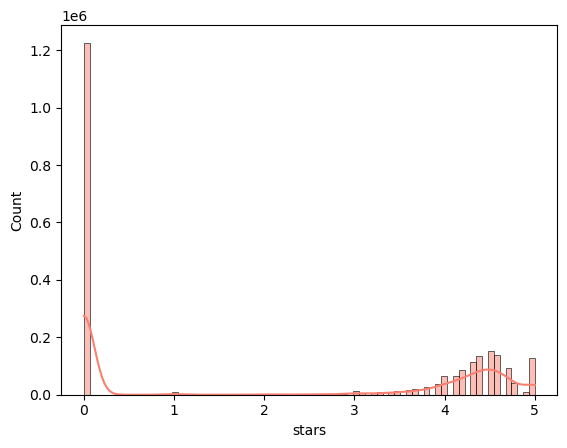

In [149]:
sns.histplot(df['stars'], kde=True, color="salmon")

The 0 seems to be the most common rating